In [233]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [234]:
df = pd.read_csv('csv/Audience Report Formatted.csv')

df_claravine = pd.read_csv('csv/Claravine.csv')

In [235]:
df_merged = pd.merge(df, df_claravine, on ='Segment ID', how='left')

In [236]:
df_merged.fillna(0, inplace=True)

In [237]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49282 entries, 0 to 49281
Data columns (total 64 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   49282 non-null  int64  
 1   Funnel                                       49282 non-null  object 
 2   Country_x                                    49282 non-null  object 
 3   Dell Fiscal Quarter                          49282 non-null  object 
 4   Vehicle                                      49282 non-null  object 
 5   BU_lvl2                                      49282 non-null  object 
 6   Display Report Site Name                     49282 non-null  object 
 7   Campaign Name                                49282 non-null  object 
 8   Media Buy Name                               49282 non-null  object 
 9   Display BRR Line Item                        49282 non-null  object 
 10

In [238]:
df_merged['Data Provider'].unique()

array([0, 'Oracle Data Marketplace', 'Alliant', '123Push', '3P Multiple',
       '33Across', 'CEP', 'CIP', 'Lotame', 'comScore',
       '180byTwo-Dun and Bradstreet-Eyeota', 'AIQ',
       'Oracle DLX-Oracle Data Marketplace', 'Bluekai-Bombora-Oracle DLX',
       'Skydeo', 'Dun and Bradstreet',
       '123Push-Data Axle-Equifax IXI-Experian-Netwise-Webbula',
       'Dun and Bradstreet-Eyeota', 'Adstra', '180byTwo',
       '#Home by Vendigi-123Push',
       '123Push-33Across-Ameribase-AnalyticsIQ-Data Axle-Experian-Netwise-Webbula',
       'Eyeota', '123Push-180byTwo from Anteriad-33Across',
       '180byTwo from Anteriad-D&B',
       'Dun and Bradstreet-Eyeota-Trusignal',
       'AdAdvisor Audiences by Neustar', '123Push-AnalyticsIQ',
       'Data Axle', '180byTwo from Anteriad',
       '180byTwo from Anteriad-Data Axle',
       'Aberdeen-Alliant-Data Axle-Gravy-Netwise-Start.io',
       '180byTwo-Bombora-Dun and Bradstreet-Eyeota',
       'Acxiom-Alliant-Ameribase-AnalyticsIQ-Bluekai-E

In [239]:
# Grouping columns
grouping_cols = ['Funnel'
                 , 'Country_x'
                 , 'Dell Fiscal Quarter'
                 , 'Vehicle'
                 , 'BU_lvl2'
                 , 'BU_lvl1'
                 , 'Campaign Name'
                 , 'Audience Type Category'
                 , 'Audience Source'
                 , 'Data Provider'
                ]

# Aggregation functions
agg_funcs = {
    'Spend': 'sum',
    'Revenue': 'sum'
}

# Create the new dataframe
grouped_df = df_merged.groupby(grouping_cols).agg(agg_funcs).reset_index()

# Calculate ROAS
grouped_df['ROAS'] = grouped_df['Revenue'] / grouped_df['Spend']

# Round the values in the 'grouped_df' DataFrame to two decimal places
grouped_df = grouped_df.round(decimals=2, out=None)

In [240]:
grouped_csb_df = grouped_df[grouped_df['BU_lvl1'].isin(['CSB'])]

grouped_b2b_df = grouped_df[grouped_df['BU_lvl1'].isin(['B2B'])]

[]

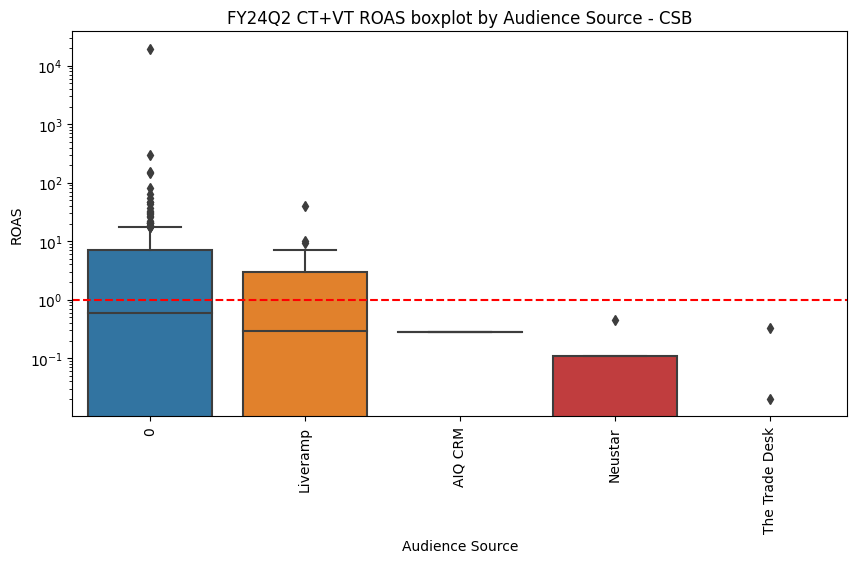

In [241]:
# Create a box plot by 'BU_lvl1'
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set plot title and labels
ax1.set_title('FY24Q2 CT+VT ROAS boxplot by Audience Source - CSB')
ax1.set_ylabel('ROAS')

# Create the box plot
sns.boxplot(data=grouped_csb_df, x='Audience Source', y='ROAS')

plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')

plt.xticks(rotation=90)

# Show the plot
plt.semilogy()


[]

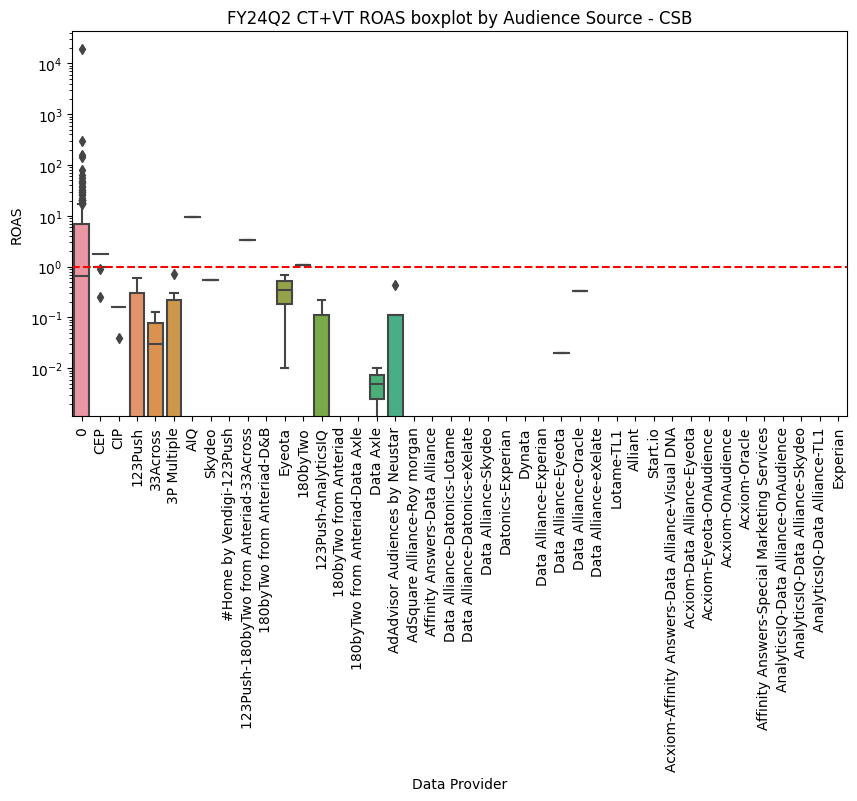

In [242]:
# Create a box plot by 'BU_lvl1'
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set plot title and labels
ax1.set_title('FY24Q2 CT+VT ROAS boxplot by Audience Source - CSB')
ax1.set_ylabel('ROAS')

# Create the box plot
sns.boxplot(data=grouped_csb_df, x='Data Provider', y='ROAS')

plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')

plt.xticks(rotation=90)

# Show the plot
plt.semilogy()


[]

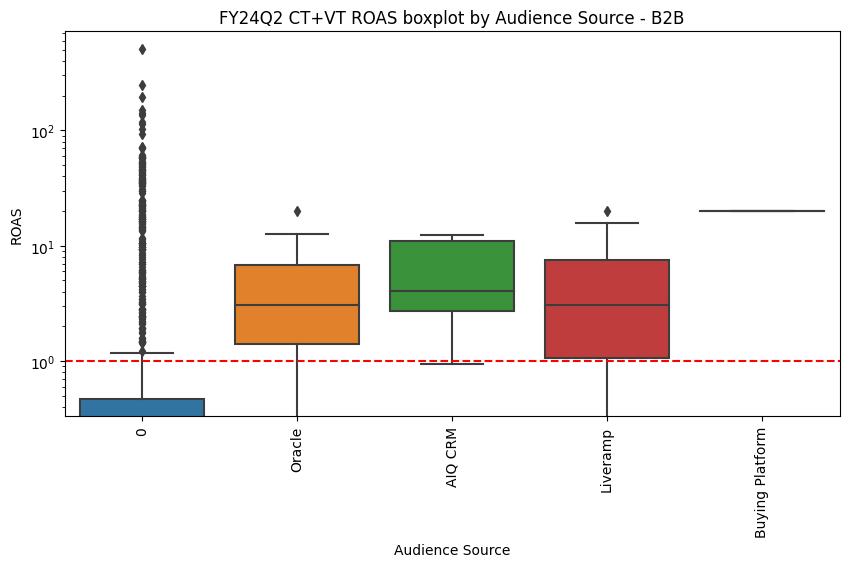

In [243]:
# Create a box plot by 'BU_lvl1'
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set plot title and labels
ax1.set_title('FY24Q2 CT+VT ROAS boxplot by Audience Source - B2B')
ax1.set_ylabel('ROAS')

# Create the box plot
sns.boxplot(data=grouped_b2b_df, x='Audience Source', y='ROAS')

plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')

plt.xticks(rotation=90)

# Show the plot
plt.semilogy()


[]

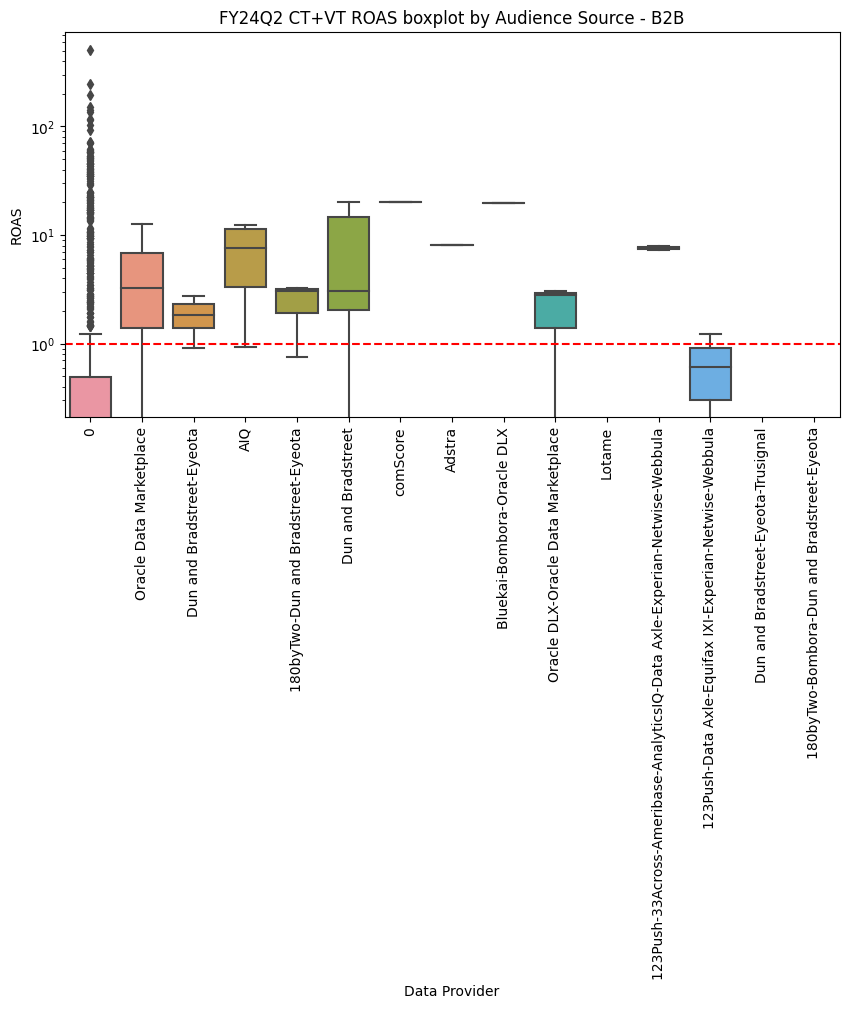

In [244]:
# Create a box plot by 'BU_lvl1'
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set plot title and labels
ax1.set_title('FY24Q2 CT+VT ROAS boxplot by Audience Source - B2B')
ax1.set_ylabel('ROAS')

# Create the box plot
sns.boxplot(data=grouped_b2b_df, x='Data Provider', y='ROAS')

plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')

plt.xticks(rotation=90)

# Show the plot
plt.semilogy()
